In [13]:
using JLD2
using Images
using DifferentialEquations, ForwardDiff, OrdinaryDiffEq, Sundials
using Plots, LaTeXStrings
using LsqFit

# Input

In [2]:
F= jldopen("Results_out_V0.5Uin0.1.jld2","r");
#F= jldopen("Results_out_V0.5Uin0.5.jld2","r");
#F= jldopen("Results_out_V0.5Uin1.0.jld2","r");
#F= jldopen("Results_out_V0.5Uin2.0.jld2","r");
#F= jldopen("Results_out_V0.5Uin4.0.jld2","r");            


#F= jldopen("Results_out_V1.0Uin0.1.jld2","r");
#F= jldopen("Results_out_V1.0Uin0.5.jld2","r");
#F= jldopen("Results_out_V1.0Uin1.0.jld2","r");
#F= jldopen("Results_out_V1.0Uin2.0.jld2","r");
#F= jldopen("Results_out_V1.0Uin4.0.jld2","r");

#F= jldopen("Results_out_Ufi1.0Vfi0.5.jld2","r");
#F= jldopen("Results_out_Ufi1.0Vfi1.0.jld2","r");
#F= jldopen("Results_out_Ufi2.0Vfi0.5.jld2","r");
#F= jldopen("Results_out_Ufi2.0Vfi1.0.jld2","r");  



In [3]:
for i in 1:length(F)
    println(i,"\t\t",F["$i"]["Uin"],"\t",F["$i"]["Vin"],"\t",F["$i"]["UU"],"\t",F["$i"]["VV"])
end

1		0.1	0.5	0.1	0.5
2		0.1	0.5	0.2	0.5
3		0.1	0.5	0.3	0.5
4		0.1	0.5	0.4	0.5
5		0.1	0.5	0.5	0.5
6		0.1	0.5	0.6	0.5
7		0.1	0.5	0.7	0.5
8		0.1	0.5	0.8	0.5
9		0.1	0.5	0.9	0.5
10		0.1	0.5	1.0	0.5
11		0.1	0.5	1.1	0.5
12		0.1	0.5	1.2	0.5
13		0.1	0.5	1.3	0.5
14		0.1	0.5	1.41	0.5
15		0.1	0.5	1.42	0.5
16		0.1	0.5	1.43	0.5
17		0.1	0.5	1.44	0.5
18		0.1	0.5	1.45	0.5
19		0.1	0.5	1.46	0.5
20		0.1	0.5	1.47	0.5
21		0.1	0.5	1.48	0.5
22		0.1	0.5	1.49	0.5
23		0.1	0.5	1.4	0.5
24		0.1	0.5	1.51	0.5
25		0.1	0.5	1.52	0.5
26		0.1	0.5	1.53	0.5
27		0.1	0.5	1.54	0.5
28		0.1	0.5	1.55	0.5
29		0.1	0.5	1.56	0.5
30		0.1	0.5	1.57	0.5
31		0.1	0.5	1.58	0.5
32		0.1	0.5	1.59	0.5
33		0.1	0.5	1.5	0.5
34		0.1	0.5	1.61	0.5
35		0.1	0.5	1.62	0.5
36		0.1	0.5	1.63	0.5
37		0.1	0.5	1.64	0.5
38		0.1	0.5	1.65	0.5
39		0.1	0.5	1.66	0.5
40		0.1	0.5	1.67	0.5
41		0.1	0.5	1.68	0.5
42		0.1	0.5	1.69	0.5
43		0.1	0.5	1.6	0.5
44		0.1	0.5	1.71	0.5
45		0.1	0.5	1.72	0.5
46		0.1	0.5	1.73	0.5
47		0.1	0.5	1.74	0.5
48		0.1	0.5	1.75	0.5
49		0.1	0.5	1.76	

0.5  0.1  0.5   1.0


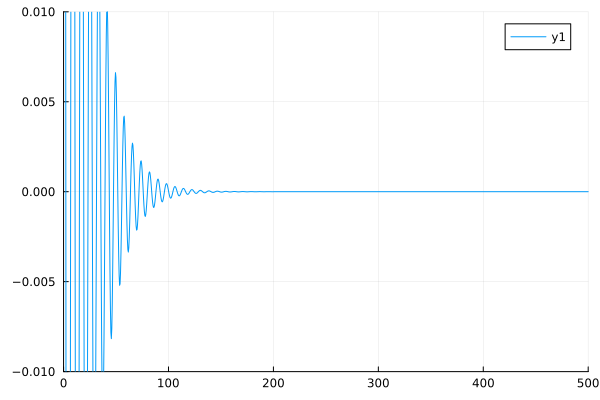

In [4]:
jj=10

Uin=F["$jj"]["Uin"]
Vin=F["$jj"]["Vin"]
UU=F["$jj"]["UU"]
VV=F["$jj"]["VV"]
t=F["$jj"]["t"]
x1=F["$jj"]["solution_rho"][1,:]
x2=F["$jj"]["solution_rho"][2,:]

println("$Vin  $Uin  $VV   $UU")

plot(t, real.(x1 .- x1[end]),xlimits=(0,500),ylimits=(-0.01,0.01))

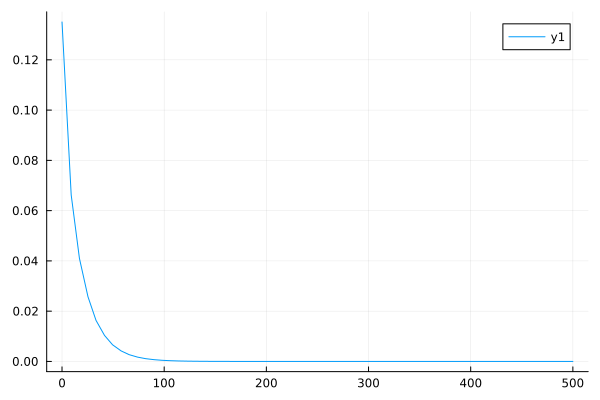

In [28]:
x1maxindex=findlocalmaxima(real(x1 .- x1[end]));
xdata_0 = t[x1maxindex]
ydata_0 = real.(x1[x1maxindex] .- x1[end])
plot(xdata_0,ydata_0)

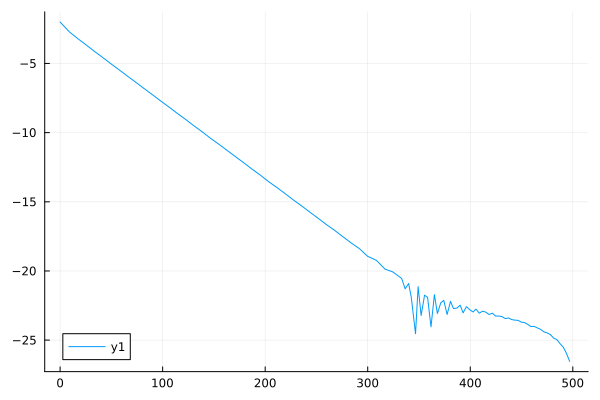

In [29]:
plot(xdata_0,log.(abs.(ydata_0)))

In [25]:
length(x1maxindex)


95

In [34]:
300/500*95

57.0

In [43]:
t[x1maxindex[5]]

33.28469895125655

In [104]:
i_tstart=5
i_tfinal=39

xdata=xdata_0[i_tstart:i_tfinal]
ydata=ydata_0[i_tstart:i_tfinal]

parameter=[0.70717,0.00072]
#m(t, p) = p[1] .* exp.(- t .* p[2])
m(t, p) = p[1] .* t.^(-p[2])

p0=deepcopy(parameter)

fit = curve_fit(m, xdata, ydata, p0);

parameter=deepcopy(fit.param)

if (!fit.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci = confidence_interval(fit, 0.1)
total_err = sum(map(x -> abs(x[2] - x[1]), ci))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')


println(parameter)
 
cov = estimate_covar(fit)


[197.75749364820345, 2.6715152800729287]


2×2 Matrix{Float64}:
 2998.42     4.15698
    4.15698  0.00578413

In [98]:
xdata[2]

41.60120855421694

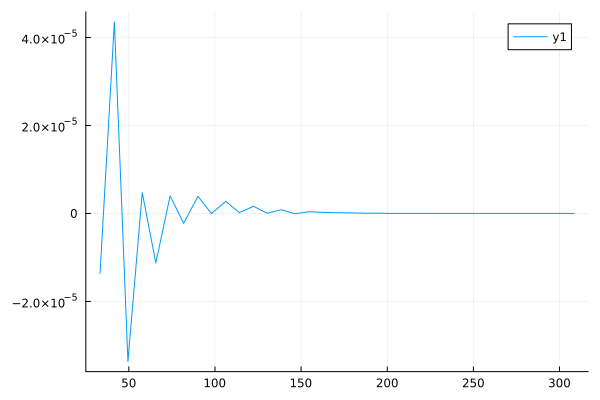

In [101]:
#plot(xdata,ydata)
#plot!(xdata,  0.10361845848930211 .* exp.(-0.055497084482548316 .* xdata) )
plot(xdata,  ydata - 0.10361845848930211 .* exp.(-0.055497084482548316 .* xdata))

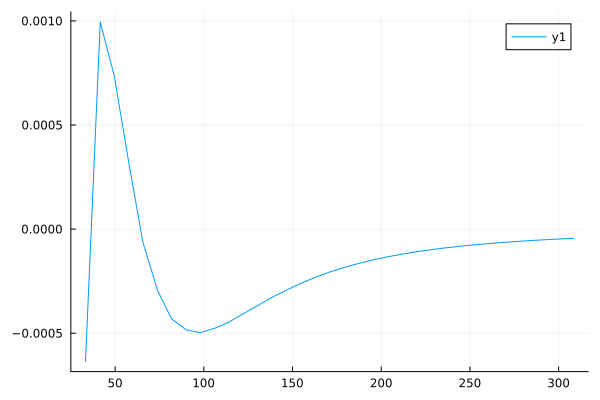

In [105]:
#plot(xdata,ydata)
#plot!(xdata,  0.10361845848930211 .* exp.(-0.055497084482548316 .* xdata) )
plot(xdata,  ydata - 197.75749364820345 .* xdata.^(-2.6715152800729287))

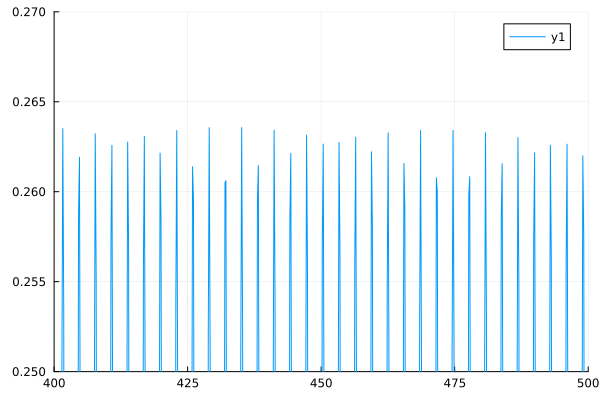

In [62]:
plot(t, real.(x2 .- x2[end]),xlimits=(400,500),ylimits=(0.25,0.27))

In [6]:
tmp1 = real.(x1 .- x1[end])[end-300:end]
tmp1_f = circshift(fft(tmp1),trunc(Int, length(tmp1)/2))

tmp2 = real.(x2 .- x2[end])[end-300:end]
tmp2_f = circshift(fft(tmp2),trunc(Int, length(tmp2)/2))

#plot(real(tmp_f)) #, ylims=(-0.01,0.01),)
plot(imag(tmp1_f)/maximum(imag(tmp1_f)),markershape=:x)
    
plot!(imag(tmp2_f)/maximum(imag(tmp2_f)),xlimits=(180,200),markershape=:+)

LoadError: UndefVarError: fft not defined

In [64]:
ii=10


tstart=50     
tfinal=100    

# 0.2 (0.5,0.1)
parameter=[0.21476, 0.01749, 0.00072, 0.70717, 0.00184,  4.0e-5]

# 2.0 (0.5,0.1)
#parameter=[0.02684, 0.00032*cos(2.62761),0.00032*sin(2.62761), 1.14672, 0.08477,   -0.03159]


#parameter=[0.00662, 0.00085*cos(1.42816), 0.00085*sin(1.42816),-0.02675,0.00941,-0.00571]

#parameter=[0.03682, 0.00352, 0.63532, -0.02062, 1.00625, 0.10412]
#parameter=[0.0526, -0.0546, 0.02986, 0.9214, 0.1230, -0.0056]
#parameter=[0.0526, -0.0546, 0.02986, 0.9214, 0.1230, -0.0056, 0.1236]

#parameter=[0.16483, 0.06228, 0.01878, 0.71929,  0.0122, 0.00065,0.0126]
#parameter=[0.015157305309540632, 0.0001,0.0001,0.0001, 0.04625847204236299, -0.015667519494836402]
#parameter=[0.015157305309540632, 0.04625847204236299, -0.015667519494836402]

Uin=F["$ii"]["Uin"]
Vin=F["$ii"]["Vin"]
UU=F["$ii"]["UU"]
VV=F["$ii"]["VV"]
t=F["$ii"]["t"]
x1=F["$ii"]["solution_rho"][1,:]
fit = nothing


println("$VV   $UU")
    
i_tstart=0
for it in 1:length(t)
    if t[it] >= tstart
        i_tstart=it
        break
    end
end
println("$tstart  $i_tstart")

i_tfinal=0  
for it in 1:length(t)
    if t[it] >= tfinal
        i_tfinal=it
        break
    end
end
println("$tfinal  $i_tfinal")


xdata = t[i_tstart:i_tfinal]
ydata = real.(x1[i_tstart:i_tfinal])



m(t, p) = p[1]  .+ (p[2] .* cos.(t .* p[4]) .+  p[3] .* sin.(t .*p[4]) .+ p[6]).* exp.(- t .* p[5]) 
#m(t, p) = p[1]  .+  p[3].* exp.(- t .* p[2]) 

#m(t, p)=p[1].+(p[2].*cos.(t .* p[4]).+ p[3].*sin.(t .*p[4])).*exp.(- t .* p[5]).+ p[6].* exp.(- t .* p[7]) 

p0=deepcopy(parameter)

fit = curve_fit(m, xdata, ydata, p0);

parameter=deepcopy(fit.param)



if (!fit.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci = confidence_interval(fit, 0.1)
total_err = sum(map(x -> abs(x[2] - x[1]), ci))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')


A= Array{Float64}(undef,3);
B= Array{Float64}(undef,3);
C= Array{Float64}(undef,3);
phi= Array{Float64}(undef,3);
omega= Array{Float64}(undef,3);
alpha= Array{Float64}(undef,3);

### A   
A[1]=parameter[1]
A[2]=ci[1][1] - A[1] 
A[3]=ci[1][2] - A[1]
    
### B
B[1]=sqrt(parameter[2]*parameter[2]+ parameter[3]*parameter[3])
# p2/B ci2 + p3/B ci3
Del2_l=ci[2][1] - parameter[2]
Del3_l=ci[3][1] - parameter[3]
Del2_u=ci[2][2] - parameter[2]
Del3_u=ci[3][2] - parameter[3]
    
B[2]=parameter[2]/B[1] * Del2_l  + parameter[3]/B[1] *  Del3_l
B[3]=parameter[2]/B[1] * Del2_u  + parameter[3]/B[1] *  Del3_u
    
### phi
phi[1]=acos(parameter[2]/B[1])
# -|p3|/B^2 ci2 + p2 sign(p3)/B^2 ci3 
phi[2]=(-abs(parameter[3])/(B[1] * B[1]) * Del2_l
               +parameter[2] * sign(parameter[3])/(B[1]*B[1]) * Del3_l)
phi[3]=(-abs(parameter[3])/(B[1] * B[1]) * Del2_u
               +parameter[2] * sign(parameter[3])/(B[1]*B[1]) * Del3_u)
    
### C
C[1]=parameter[6]
C[2]=ci[6][1] - C[1]
C[3]=ci[6][2] - C[1]
    
    
### omega 
omega[1]=parameter[4]
omega[2]=ci[4][1] - omega[1]
omega[3]=ci[4][2] - omega[1]
    
### 1/trel
alpha[1]=parameter[5]
alpha[2]=ci[5][1] - alpha[1]
alpha[3]=ci[5][2] - alpha[1]    


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')




 
omega1 =fmt_fl(omega[1])
omega2 =fmt_fl(omega[2])
omega3 =fmt_fl(omega[3])    
println("omega:  $UU  $omega1  $omega2  $omega3\n")


alpha1 =fmt_fl(alpha[1])
alpha2 =fmt_fl(alpha[2])
alpha3 =fmt_fl(alpha[3])    
println("alpha:  $UU  $alpha1  $alpha2  $alpha3\n")


#aaalpha1 =fmt_fl(parameter[7])
#aaalpha2 =fmt_fl(ci[7][1] - parameter[7])
#aaalpha3 =fmt_fl(ci[7][2] - parameter[7])    
#println("aaalpha:  $UU  $aaalpha1  $aaalpha2  $aaalpha3\n")

A1 =fmt_fl(A[1])
A2 =fmt_fl(A[2])
A3 =fmt_fl(A[3])
println("A:  $UU  $A1  $A2  $A3\n")

  
B1 =fmt_fl(B[1])
B2 =fmt_fl(B[2])
B3 =fmt_fl(B[3])
println("B:  $UU  $B1  $B2  $B3\n")

    
phi1 =fmt_fl(phi[1])
phi2 =fmt_fl(phi[2])
phi3 =fmt_fl(phi[3])    
println("phi: $UU  $phi1  $phi2  $phi3\n")


C1 =fmt_fl(C[1])
C2 =fmt_fl(C[2])
C3 =fmt_fl(C[3])
println("C:  $UU  $C1  $C2  $C3\n")


     
println("parameters:   $UU  $A1  $B1  $phi1  $C1  $omega1  $alpha1 \n")




cov = estimate_covar(fit)





0.5   1.0
50  119
100  233
omega:  1.0  0.77701  -7.0e-5   7.0e-5

alpha:  1.0  0.05533  -7.0e-5   7.0e-5

A:  1.0  0.09724     -0.0      0.0

B:  1.0  0.10247  -0.00057  0.00057

phi: 1.0  0.86259   0.0007  -0.0007

C:  1.0  0.00038  -7.0e-5   7.0e-5

parameters:   1.0  0.09724  0.10247  0.86259  0.00038  0.77701  0.05533 



6×6 Matrix{Float64}:
  1.124e-12    -2.67333e-11   2.71029e-11  …   8.14501e-13  -3.5252e-11
 -2.67333e-11   6.49156e-8    2.17988e-9       6.98215e-9    2.30425e-9
  2.71029e-11   2.17988e-9    5.3543e-8        6.83107e-9   -1.26618e-9
  5.54635e-12  -7.6879e-9     5.42633e-9      -1.27165e-10  -3.75891e-10
  8.14501e-13   6.98215e-9    6.83107e-9       1.59653e-9    6.84174e-11
 -3.5252e-11    2.30425e-9   -1.26618e-9   …   6.84174e-11   1.72696e-9

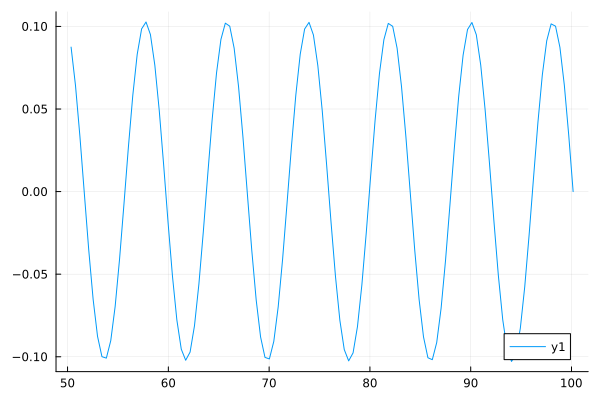

In [65]:
plot(xdata,(ydata .- ydata[end]).* exp.(xdata .* parameter[5] ) ) 
#plot(xdata,(ydata .- ydata[end]) ) 

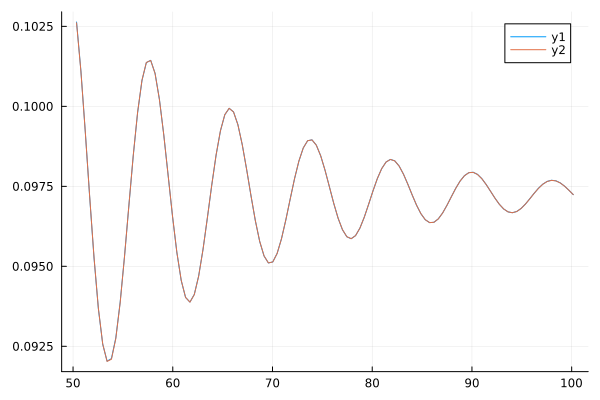

In [66]:
#plot(xdata, (ydata .- ydata[end]).* exp.(xdata .* (parameter[5])),ylims=(-0.25,0.25))

#plot(xdata,(ydata-m(xdata, parameter))./ydata)

#plot(xdata,(ydata-m(xdata, parameter)))

plot(xdata,ydata)
plot!(xdata, m(xdata, parameter))

In [56]:
ii=10


tstart=50     
tfinal=100    

# 0.2 (0.5,0.1)
#parameter=[0.21476, 0.01749, 0.00072, 0.70717]
parameter=[0.21476, 0.01749, 0.00072, 0.70717, 5,  4.0e-5]

# 2.0 (0.5,0.1)
#parameter=[0.02684, 0.00032*cos(2.62761),0.00032*sin(2.62761), 1.14672, 0.08477,   -0.03159]


#parameter=[0.00662, 0.00085*cos(1.42816), 0.00085*sin(1.42816),-0.02675,0.00941,-0.00571]

#parameter=[0.03682, 0.00352, 0.63532, -0.02062, 1.00625, 0.10412]
#parameter=[0.0526, -0.0546, 0.02986, 0.9214, 0.1230, -0.0056]
#parameter=[0.0526, -0.0546, 0.02986, 0.9214, 0.1230, -0.0056, 0.1236]

#parameter=[0.16483, 0.06228, 0.01878, 0.71929,  0.0122, 0.00065,0.0126]
#parameter=[0.015157305309540632, 0.0001,0.0001,0.0001, 0.04625847204236299, -0.015667519494836402]
#parameter=[0.015157305309540632, 0.04625847204236299, -0.015667519494836402]

Uin=F["$ii"]["Uin"]
Vin=F["$ii"]["Vin"]
UU=F["$ii"]["UU"]
VV=F["$ii"]["VV"]
t=F["$ii"]["t"]
x1=F["$ii"]["solution_rho"][1,:]
fit = nothing


println("$VV   $UU")
    
i_tstart=0
for it in 1:length(t)
    if t[it] >= tstart
        i_tstart=it
        break
    end
end
println("$tstart  $i_tstart")

i_tfinal=0  
for it in 1:length(t)
    if t[it] >= tfinal
        i_tfinal=it
        break
    end
end
println("$tfinal  $i_tfinal")


xdata = t[i_tstart:i_tfinal]
ydata = real.(x1[i_tstart:i_tfinal])



m(t, p) = p[1]  .+ (p[2] .* cos.(t .* p[4]) .+  p[3] .* sin.(t .*p[4])  .+ p[6]).* t.^(-p[5])
#m(t, p) = p[1]  .+  p[3].* exp.(- t .* p[2]) 

#m(t, p)=p[1].+(p[2].*cos.(t .* p[4]).+ p[3].*sin.(t .*p[4])).*exp.(- t .* p[5]).+ p[6].* exp.(- t .* p[7]) 

p0=deepcopy(parameter)

fit = curve_fit(m, xdata, ydata, p0);

parameter=deepcopy(fit.param)



if (!fit.converged) 
    println("WARNING: FIT NOT CONVERGED")  
end


ci = confidence_interval(fit, 0.1)
total_err = sum(map(x -> abs(x[2] - x[1]), ci))


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')


A= Array{Float64}(undef,3);
B= Array{Float64}(undef,3);
C= Array{Float64}(undef,3);
phi= Array{Float64}(undef,3);
omega= Array{Float64}(undef,3);
alpha= Array{Float64}(undef,3);

### A   
A[1]=parameter[1]
A[2]=ci[1][1] - A[1] 
A[3]=ci[1][2] - A[1]
    
### B
B[1]=sqrt(parameter[2]*parameter[2]+ parameter[3]*parameter[3])
# p2/B ci2 + p3/B ci3
Del2_l=ci[2][1] - parameter[2]
Del3_l=ci[3][1] - parameter[3]
Del2_u=ci[2][2] - parameter[2]
Del3_u=ci[3][2] - parameter[3]
    
B[2]=parameter[2]/B[1] * Del2_l  + parameter[3]/B[1] *  Del3_l
B[3]=parameter[2]/B[1] * Del2_u  + parameter[3]/B[1] *  Del3_u
    
### phi
phi[1]=acos(parameter[2]/B[1])
# -|p3|/B^2 ci2 + p2 sign(p3)/B^2 ci3 
phi[2]=(-abs(parameter[3])/(B[1] * B[1]) * Del2_l
               +parameter[2] * sign(parameter[3])/(B[1]*B[1]) * Del3_l)
phi[3]=(-abs(parameter[3])/(B[1] * B[1]) * Del2_u
               +parameter[2] * sign(parameter[3])/(B[1]*B[1]) * Del3_u)
    
### C
C[1]=parameter[6]
C[2]=ci[6][1] - C[1]
C[3]=ci[6][2] - C[1]
    
    
### omega 
omega[1]=parameter[4]
omega[2]=ci[4][1] - omega[1]
omega[3]=ci[4][2] - omega[1]
    
### 1/trel
alpha[1]=parameter[5]
alpha[2]=ci[5][1] - alpha[1]
alpha[3]=ci[5][2] - alpha[1]    


fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')




 
omega1 =fmt_fl(omega[1])
omega2 =fmt_fl(omega[2])
omega3 =fmt_fl(omega[3])    
println("omega:  $UU  $omega1  $omega2  $omega3\n")


alpha1 =fmt_fl(alpha[1])
alpha2 =fmt_fl(alpha[2])
alpha3 =fmt_fl(alpha[3])    
println("alpha:  $UU  $alpha1  $alpha2  $alpha3\n")


#aaalpha1 =fmt_fl(parameter[7])
#aaalpha2 =fmt_fl(ci[7][1] - parameter[7])
#aaalpha3 =fmt_fl(ci[7][2] - parameter[7])    
#println("aaalpha:  $UU  $aaalpha1  $aaalpha2  $aaalpha3\n")

A1 =fmt_fl(A[1])
A2 =fmt_fl(A[2])
A3 =fmt_fl(A[3])
println("A:  $UU  $A1  $A2  $A3\n")

  
B1 =fmt_fl(B[1])
B2 =fmt_fl(B[2])
B3 =fmt_fl(B[3])
println("B:  $UU  $B1  $B2  $B3\n")

    
phi1 =fmt_fl(phi[1])
phi2 =fmt_fl(phi[2])
phi3 =fmt_fl(phi[3])    
println("phi: $UU  $phi1  $phi2  $phi3\n")


C1 =fmt_fl(C[1])
C2 =fmt_fl(C[2])
C3 =fmt_fl(C[3])
println("C:  $UU  $C1  $C2  $C3\n")


     
println("parameters:   $UU  $A1  $B1  $phi1  $C1  $omega1  $alpha1 \n")




cov = estimate_covar(fit)



0.5   1.0
50  119
100  233
omega:  1.0   0.7766  -0.00076  0.00076

alpha:  1.0  3.59134  -0.05004  0.05004

A:  1.0  0.09723  -2.0e-5   2.0e-5

B:  1.0  8676.90808  -1813.48505  1813.48505

phi: 1.0  0.83416  0.00556  -0.00556

C:  1.0  54.43627  -75.19927  75.19927

parameters:   1.0  0.09723  8676.90808  0.83416  54.43627   0.7766  3.59134 



6×6 Matrix{Float64}:
  1.8058e-10     -0.000166825  …   1.10984e-8     -0.000485971
 -0.000166825     5.714e5         22.1533       7627.84
  0.000644646     5.41584e5       23.351        3719.9
  9.44754e-10    -0.109769        -1.24724e-6     -0.00534406
  1.10984e-8     22.1533           0.000909803     0.218634
 -0.000485971  7627.84         …   0.218634     2054.75

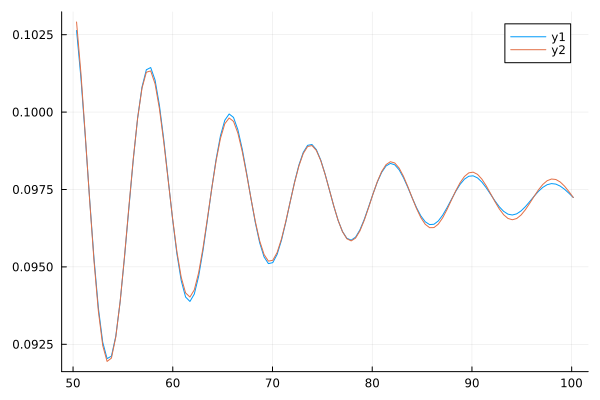

In [57]:
#plot(xdata,(ydata-m(xdata, parameter)))
plot(xdata,ydata)
plot!(xdata, m(xdata, parameter))

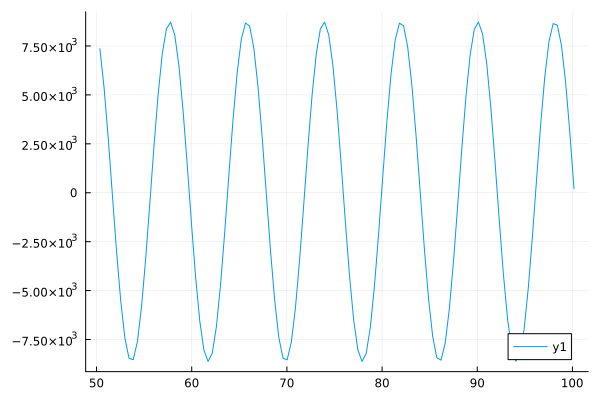

In [62]:
#plot(xdata,(ydata .- ydata[end]).* xdata.^(parameter[5]))
#plot(xdata,(ydata .- ydata[end]))
plot(xdata,(m(xdata, parameter) .- parameter[1]).* xdata.^(parameter[5]))  

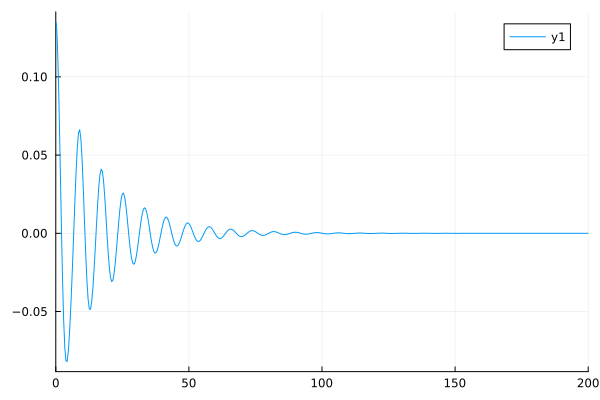

In [69]:
plot(t, real.(x1 .- x1[end]),xlimits=(0,200))

In [217]:
fmt_fl(x::Float64; left=3, right=5) = lpad(round(x, digits=5), 7,' ')




open("omega_V($VV)_Uin($Uin).dat", "a") do file
    
    omega1 =fmt_fl(omega[1])
    omega2 =fmt_fl(omega[2])
    omega3 =fmt_fl(omega[3])
    
    write(file, "$UU  $omega1  $omega2  $omega3\n")
    println("omega:  $UU  $omega1  $omega2  $omega3\n")
end


open("alpha_V($VV)_Uin($Uin).dat", "a") do file
    
    alpha1 =fmt_fl(alpha[1])
    alpha2 =fmt_fl(alpha[2])
    alpha3 =fmt_fl(alpha[3])
    
    write(file, "$UU  $alpha1  $alpha2  $alpha3\n")
    println("alpha:  $UU  $alpha1  $alpha2  $alpha3\n")
end


open("A_V($VV)_Uin($Uin).dat", "a") do file
    
    A1 =fmt_fl(A[1])
    A2 =fmt_fl(A[2])
    A3 =fmt_fl(A[3])
    
    write(file, "$UU  $A1  $A2  $A3\n")
    println("A:  $UU  $A1  $A2  $A3\n")
end


open("B_V($VV)_Uin($Uin).dat", "a") do file
    
    B1 =fmt_fl(B[1])
    B2 =fmt_fl(B[2])
    B3 =fmt_fl(B[3])
    
    write(file, "$UU  $B1  $B2  $B3\n")
    println("B:  $UU  $B1  $B2  $B3\n")
end


open("phi_V($VV)_Uin($Uin).dat", "a") do file
    
    phi1 =fmt_fl(phi[1])
    phi2 =fmt_fl(phi[2])
    phi3 =fmt_fl(phi[3])
    
    write(file, "$UU  $phi1  $phi2  $phi3\n")
    println("phi: $UU  $phi1  $phi2  $phi3\n")
end


open("C_V($VV)_Uin($Uin).dat", "a") do file
    
    C1 =fmt_fl(C[1])
    C2 =fmt_fl(C[2])
    C3 =fmt_fl(C[3])
    
    write(file, "$UU  $C1  $C2  $C3\n")
    println("C:  $UU  $C1  $C2  $C3\n")
end


open("parameters_V($VV)_Uin($Uin).dat", "a") do file
   
    omega1 =fmt_fl(omega[1])
    alpha1 =fmt_fl(alpha[1])
    A1 =fmt_fl(A[1])
    B1 =fmt_fl(B[1])
    phi1 =fmt_fl(phi[1])
    C1 =fmt_fl(C[1])
        
    write(file, "$UU  $A1  $B1  $phi1  $C1  $omega1  $alpha1 \n")
    println("parameters:   $UU  $A1  $B1  $phi1  $C1  $omega1  $alpha1 \n")
end

omega:  3.5  2.04141  -0.00552  0.00552

alpha:  3.5  0.04435  -0.00522  0.00522

A:  3.5  0.00156  -1.0e-5   1.0e-5

B:  3.5  0.00233  -0.00015  0.00015

phi: 3.5  0.64004  0.46313  -0.46313

C:  3.5  -0.00108  -0.0003   0.0003

parameters:   3.5  0.00156  0.00233  0.64004  -0.00108  2.04141  0.04435 



In [97]:
#parameter_BU=deepcopy(parameter)

In [9]:
#parameter=deepcopy(parameter_BU)

In [98]:
LL=10
using LinearAlgebra
const Q = UpperTriangular(Int[(LL+1)*i - (i+1)*i/2 + j for i in 0:LL, j in 0:LL])
const P = UpperTriangular(Int[(i-1)*LL - (i+1)*i/2 + j for i in 1:LL, j in 1:LL])
const S = UpperTriangular(Int[(i-1)*4 - (i-1)*i/2 + j for i in 1:4, j in 1:4]);

const LC::Int     = floor(Int,(LL+3)*LL/2)    # Number of C
const LK::Int     = floor(Int,(LL-1)*LL/2);    # Number of K``

In [99]:
for i in 1:LL+1
    for j in 1:LL+1
        if j>i-1
            print(Q[i,j],"\t")
        else
            print(0,"\t")
        end
            
    end
    println()
end

0	1	2	3	4	5	6	7	8	9	10	
0	11	12	13	14	15	16	17	18	19	20	
0	0	21	22	23	24	25	26	27	28	29	
0	0	0	30	31	32	33	34	35	36	37	
0	0	0	0	38	39	40	41	42	43	44	
0	0	0	0	0	45	46	47	48	49	50	
0	0	0	0	0	0	51	52	53	54	55	
0	0	0	0	0	0	0	56	57	58	59	
0	0	0	0	0	0	0	0	60	61	62	
0	0	0	0	0	0	0	0	0	63	64	
0	0	0	0	0	0	0	0	0	0	65	


In [93]:
LC+LK+10

120

In [105]:
for i in 1 : 10
    Qii=floor(Int,(10+1)*i - (i+1)*i/2 + i)
    println(10+Qii)
end

21
31
40
48
55
61
66
70
73
75


In [107]:
L=10
Q = UpperTriangular(Int[(L+1)*i - (i+1)*i/2 + j for i in 0:L, j in 0:L])

11×11 UpperTriangular{Int64, Matrix{Int64}}:
 0   1   2   3   4   5   6   7   8   9  10
 ⋅  11  12  13  14  15  16  17  18  19  20
 ⋅   ⋅  21  22  23  24  25  26  27  28  29
 ⋅   ⋅   ⋅  30  31  32  33  34  35  36  37
 ⋅   ⋅   ⋅   ⋅  38  39  40  41  42  43  44
 ⋅   ⋅   ⋅   ⋅   ⋅  45  46  47  48  49  50
 ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  51  52  53  54  55
 ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  56  57  58  59
 ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  60  61  62
 ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  63  64
 ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  65

In [108]:
L=10
Q = UpperTriangular(Int[(L+1)*i - (i+1)*i/2 + j for i in 1:L, j in 1:L])

10×10 UpperTriangular{Int64, Matrix{Int64}}:
 11  12  13  14  15  16  17  18  19  20
  ⋅  21  22  23  24  25  26  27  28  29
  ⋅   ⋅  30  31  32  33  34  35  36  37
  ⋅   ⋅   ⋅  38  39  40  41  42  43  44
  ⋅   ⋅   ⋅   ⋅  45  46  47  48  49  50
  ⋅   ⋅   ⋅   ⋅   ⋅  51  52  53  54  55
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  56  57  58  59
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  60  61  62
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  63  64
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  65